# Feature Engineering

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import joblib
import os

In [ ]:
# Load the cleaned dataset
fp = pd.read_csv("../data/women_risk_cleaned.csv")

In [ ]:
# Display first few rows
fp.head()

,Timestamp,1. What is your age group?,2. What is your occupation?,3. At what time of day did the incident occur?,4. Where did the incident occur?,5. How crowded was the location at the time of the incident?,6. What was the lighting condition in the area?,7. Was any form of security present at the location?,8. Were you familiar with the area where the incident occurred?,9. What type of harassment did you experience?,10. How often have you experienced harassment in similar situations?,11. How safe did you feel during the incident?,"12. Overall, how would you rate the risk level of harassment in that situation?"
0,0,0,3,2,3,4,2,2,3,2,3,2,4
1,1,0,3,2,2,0,3,2,4,2,0,5,3
2,2,0,3,4,1,3,4,2,1,1,3,4,3
3,3,0,3,4,2,0,3,2,3,2,2,4,0
4,4,1,2,1,3,2,2,3,2,4,3,4,0


In [ ]:
# Check dataset dimensions
fp.shape

(115, 13)

In [ ]:
# Calculate correlation matrix for all features
corr_matrix = fp.corr()

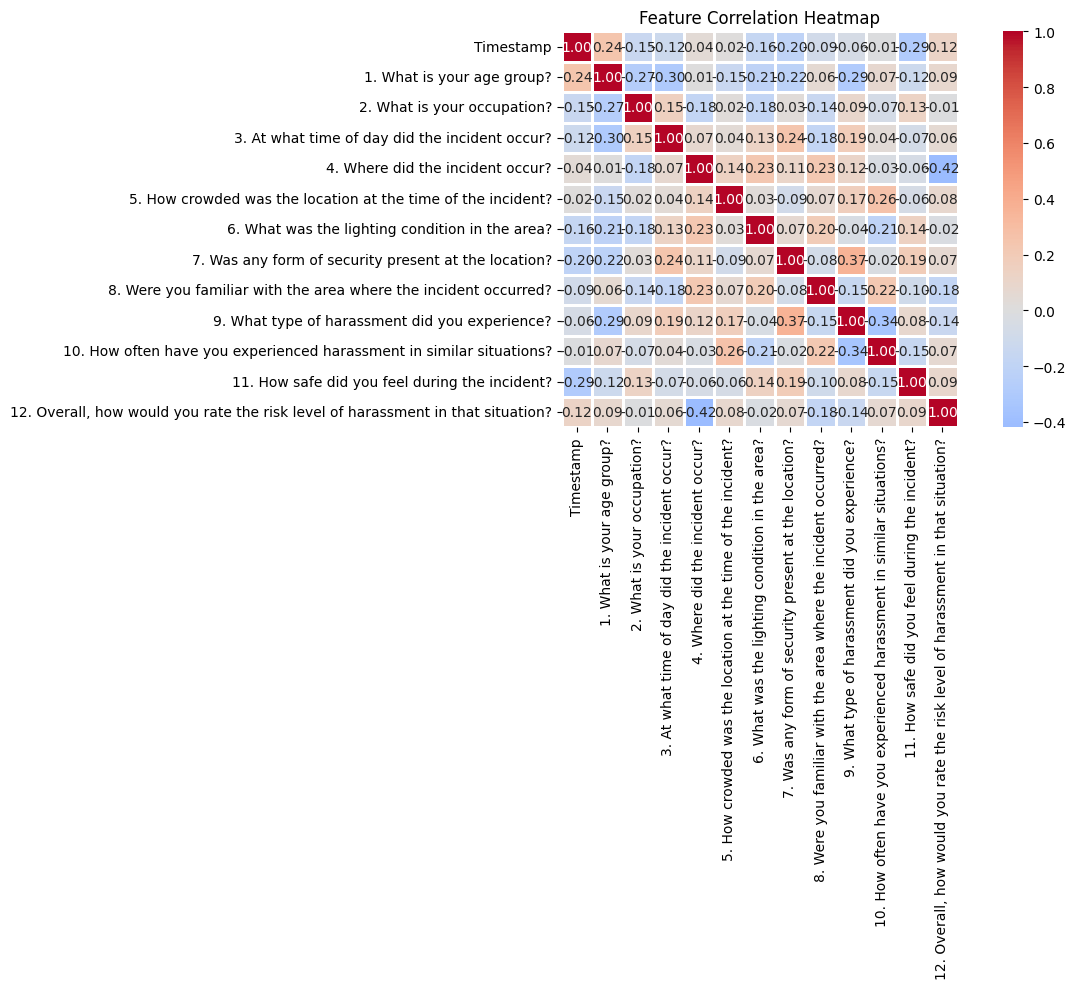

In [ ]:
# Visualize correlation heatmap for all features
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, linewidths=1)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Define the target variable column
target_col = '12. Overall, how would you rate the risk level of harassment in that situation?'

In [ ]:
# Get correlation of all features with target variable
target_corr = corr_matrix[target_col].sort_values(ascending=False)
target_corr

12. Overall, how would you rate the risk level of harassment in that situation?    1.000000
Timestamp                                                                          0.120249
11. How safe did you feel during the incident?                                     0.086500
1. What is your age group?                                                         0.085135
5. How crowded was the location at the time of the incident?                       0.079911
7. Was any form of security present at the location?                               0.068399
10. How often have you experienced harassment in similar situations?               0.065644
3. At what time of day did the incident occur?                                     0.062429
2. What is your occupation?                                                       -0.010439
6. What was the lighting condition in the area?                                   -0.022385
9. What type of harassment did you experience?                                  

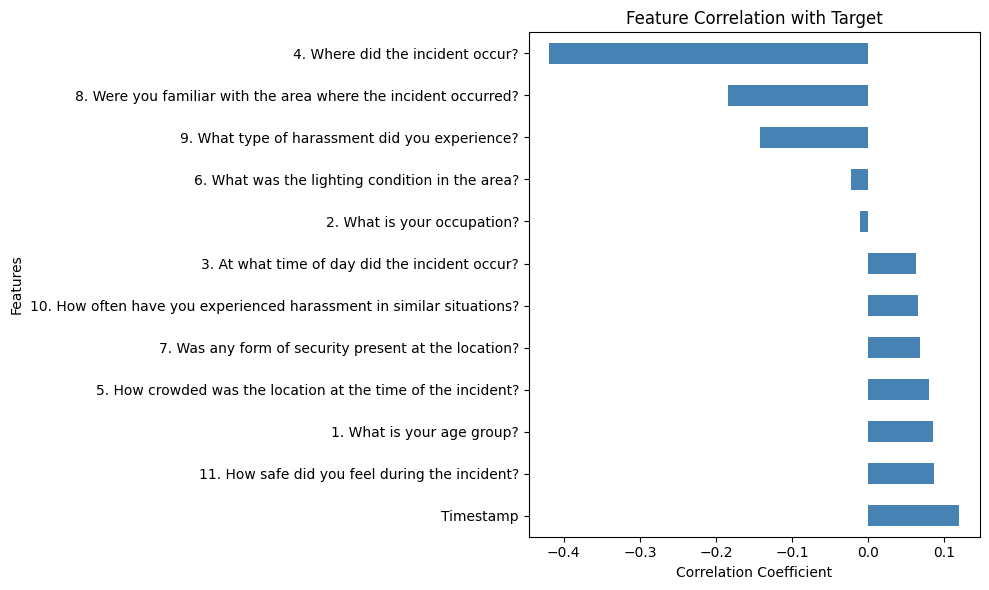

In [25]:
# Visualize feature correlations with target variable
plt.figure(figsize=(10, 6))
target_corr_filtered = target_corr[target_corr.index != target_col]
target_corr_filtered.plot(kind='barh', color='steelblue')
plt.title('Feature Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# Get all numeric columns excluding the target variable
numeric_cols = fp.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

In [ ]:
# Display list of numeric columns to scale
numeric_cols

['Timestamp',
 '1. What is your age group?',
 '2. What is your occupation?',
 '3. At what time of day did the incident occur?',
 '4. Where did the incident occur?',
 '5. How crowded was the location at the time of the incident?',
 '6. What was the lighting condition in the area?',
 '7. Was any form of security present at the location?',
 '8. Were you familiar with the area where the incident occurred?',
 '9. What type of harassment did you experience?',
 '10. How often have you experienced harassment in similar situations?',
 '11. How safe did you feel during the incident?']

In [ ]:
# Standardize all numeric features (mean=0, std=1)
scaler = StandardScaler()
fp[numeric_cols] = scaler.fit_transform(fp[numeric_cols])

In [ ]:
# Verify scaled features
fp.head()

,Timestamp,1. What is your age group?,2. What is your occupation?,3. At what time of day did the incident occur?,4. Where did the incident occur?,5. How crowded was the location at the time of the incident?,6. What was the lighting condition in the area?,7. Was any form of security present at the location?,8. Were you familiar with the area where the incident occurred?,9. What type of harassment did you experience?,10. How often have you experienced harassment in similar situations?,11. How safe did you feel during the incident?,"12. Overall, how would you rate the risk level of harassment in that situation?"
0,-1.717054,-1.101957,0.768289,0.050825,0.447315,1.626236,-0.035267,0.638877,0.438805,-0.086657,0.886103,-0.205660,4
1,-1.686931,-1.101957,0.768289,0.050825,-0.369212,-1.378055,0.775880,0.638877,1.130072,-0.086657,-1.843410,2.328366,3
2,-1.656807,-1.101957,0.768289,1.512033,-1.185740,0.875163,1.587028,0.638877,-0.943731,-0.917117,0.886103,1.483691,3
3,-1.626683,-1.101957,0.768289,1.512033,-0.369212,-1.378055,0.775880,0.638877,0.438805,-0.086657,-0.023735,1.483691,0
4,-1.596559,-0.233977,0.038097,-0.679780,0.447315,0.124090,-0.035267,1.557262,-0.252463,1.574264,0.886103,1.483691,0


In [ ]:
# Check statistical summary after scaling
fp.describe()

,Timestamp,1. What is your age group?,2. What is your occupation?,3. At what time of day did the incident occur?,4. Where did the incident occur?,5. How crowded was the location at the time of the incident?,6. What was the lighting condition in the area?,7. Was any form of security present at the location?,8. Were you familiar with the area where the incident occurred?,9. What type of harassment did you experience?,10. How often have you experienced harassment in similar situations?,11. How safe did you feel during the incident?,"12. Overall, how would you rate the risk level of harassment in that situation?"
count,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,115.000000
mean,2.316987e-17,-1.930823e-18,-6.757879e-17,2.413528e-17,-5.792468e-17,-4.633974e-17,-1.380538e-16,7.723291e-18,-9.654113e-17,1.158494e-16,1.361230e-16,7.481938e-18,1.521739
std,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.142080
min,-1.717054e+00,-1.101957e+00,-1.422287e+00,-1.410384e+00,-2.002267e+00,-1.378055e+00,-1.657562e+00,-1.197894e+00,-1.634998e+00,-1.747577e+00,-1.843410e+00,-1.895011e+00,0.000000
25%,-8.585272e-01,-1.101957e+00,-1.422287e+00,-6.797797e-01,-3.692124e-01,-6.269824e-01,-8.464147e-01,-1.197894e+00,-9.437305e-01,-9.171169e-01,-9.335724e-01,-2.056601e-01,1.000000
50%,0.000000e+00,-2.339773e-01,3.809697e-02,5.082465e-02,4.473150e-01,-6.269824e-01,-3.526728e-02,-2.795085e-01,4.388046e-01,-8.665672e-02,-2.373489e-02,-2.056601e-01,2.000000
75%,8.585272e-01,6.340029e-01,7.682888e-01,7.814290e-01,4.473150e-01,8.751630e-01,7.758802e-01,6.388766e-01,1.130072e+00,7.438035e-01,8.861026e-01,6.390153e-01,2.000000
max,1.717054e+00,2.369963e+00,1.498481e+00,1.512033e+00,1.263842e+00,1.626236e+00,1.587028e+00,1.557262e+00,1.130072e+00,1.574264e+00,1.795940e+00,2.328366e+00,4.000000


In [ ]:
# Save the scaler for later use during prediction
os.makedirs('../models', exist_ok=True)
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']

In [ ]:
# Separate features (X) and target (y)
X = fp.drop(target_col, axis=1)
y = fp[target_col]

In [ ]:
# Check shapes of X and y
X.shape, y.shape

((115, 12), (115,))

In [ ]:
# Check distribution of target variable
y.value_counts()

12. Overall, how would you rate the risk level of harassment in that situation?
2    42
0    27
1    27
3    12
4     7
Name: count, dtype: int64

In [ ]:
# Save the processed dataset for model training
fp.to_csv("../data/women_risk_processed.csv", index=False)

In [ ]:
# Verify final dataset shape
fp.shape

(115, 13)